# **CVPS20 // Neural Networks with Tensorflow and Keras: Part 2**

*November 5, 2020*

This notebook will explore the Tensorflow/Keras framework for constructing and training CNNs. 

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [5]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

#### **Load the Data and Create Training/Testing Sets**

In [6]:
# -- load data in RGB
ellip = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy") / 255.
spiral = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy") / 255.

In [7]:
spiral.shape

(5000, 106, 106, 3)

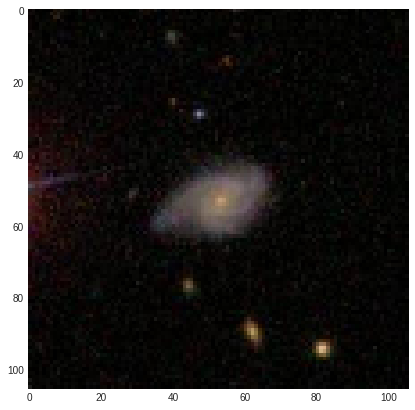

In [8]:
plt.imshow(spiral[0])

In [9]:
# -- concatenate
gals = np.concatenate((ellip, spiral), axis=0)

In [10]:
gals.shape

(10000, 106, 106, 3)

In [11]:
# -- extract shape parameters
ngal = gals.shape[0]
nrow = gals.shape[1]
ncol = gals.shape[2]

In [12]:
 # -- create features arrays
feat = gals.mean(axis=3)

In [13]:
feat.shape

(10000, 106, 106)

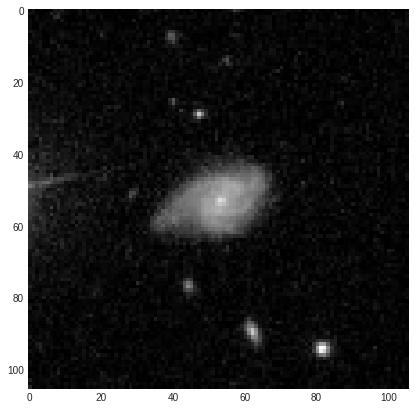

In [14]:
plt.imshow(feat[5000])

In [15]:
# -- create the target
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

In [16]:
targ.shape

(10000,)

In [17]:
# -- generate a training/testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, train_size=4000, test_size=1000, random_state=302)

In [18]:
feat_te.shape

(1000, 106, 106)

In [19]:

# -- define confusion matrix plot
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(2))
  ax.set_yticks(range(2))
  ax.set_xticklabels(["ellip", "spiral"])
  ax.set_yticklabels(["ellip", "spiral"])

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(2):
    for jj in range(2):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

---

#### **Classify Galaxy Type Using a Convolutional Neural Network**

Before we build the model, let's create features that have the full 2D shape,

In [20]:
# -- reshape the features
feat_tr = feat_tr.reshape(feat_tr.shape[0], nrow, ncol, 1)
feat_te = feat_te.reshape(feat_te.shape[0], nrow, ncol, 1)

In [21]:
feat_tr.shape

(4000, 106, 106, 1)

In [22]:
# -- define the layers
layer1 = keras.layers.Conv2D(3, (5, 5), activation="sigmoid", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="sigmoid")
layer5 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5]

In [23]:
# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=20, batch_size=100, verbose=1)

Epoch 1/20
40/40 [==============================] - 7s 7ms/step - loss: 1.6933 - accuracy: 0.4814
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5030
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5013
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5170
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4938
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5275
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5036
Epoch 8/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4932
Epoch 9/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5099
Epoch 10/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4743
Epoch 11/20
40/40 [

In [ ]:
# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Training accuracy : 0.4902
Testing accuracy  : 0.4990


*How do we interpret this accuracy?*

Let's make a slight adjustment to our model: the **activation function**,

In [25]:
# -- define the layers
layer1 = keras.layers.Conv2D(3, (5, 5), activation="relu", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="relu")
layer5 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=20, batch_size=100, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.7104 - accuracy: 0.5063
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6546 - accuracy: 0.6918
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5708 - accuracy: 0.7474
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5437 - accuracy: 0.7700
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5075 - accuracy: 0.7812
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.8020
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.8514
Epoch 8/20
40/40 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.8584
Epoch 9/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.8902
Epoch 10/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8776
Epoch 11/20
40/40 [

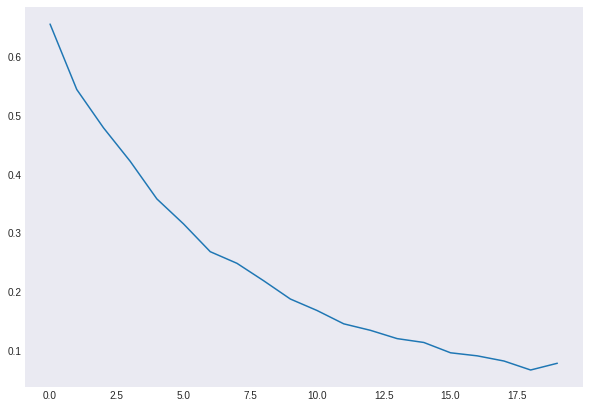

In [24]:
plt.plot(history.history["loss"])

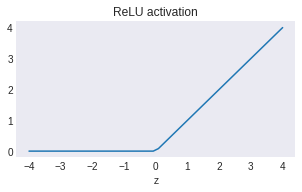

In [25]:
# -- FYI, the relu activiation function
z = np.linspace(-4, 4)
plt.figure(figsize=[5, 2.5])
plt.plot(z, z * (z > 0))
plt.title("ReLU activation")
plt.xlabel("z")
plt.show()

Let's create a bit more flexible and slightly *deeper* CNN,

In [26]:
# -- define the layers
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(1024, activation="relu")
layer7 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=50, batch_size=100, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/50
40/40 [==============================] - 2s 39ms/step - loss: 0.6896 - accuracy: 0.5488
Epoch 2/50
40/40 [==============================] - 2s 39ms/step - loss: 0.3150 - accuracy: 0.8753
Epoch 3/50
40/40 [==============================] - 2s 39ms/step - loss: 0.2456 - accuracy: 0.9001
Epoch 4/50
40/40 [==============================] - 2s 39ms/step - loss: 0.2017 - accuracy: 0.9273
Epoch 5/50
40/40 [==============================] - 2s 40ms/step - loss: 0.1534 - accuracy: 0.9409
Epoch 6/50
40/40 [==============================] - 2s 40ms/step - loss: 0.1158 - accuracy: 0.9629
Epoch 7/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0991 - accuracy: 0.9646
Epoch 8/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0769 - accuracy: 0.9773
Epoch 9/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0506 - accuracy: 0.9825
Epoch 10/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0431 - accuracy: 0.9848
Epoch 11/

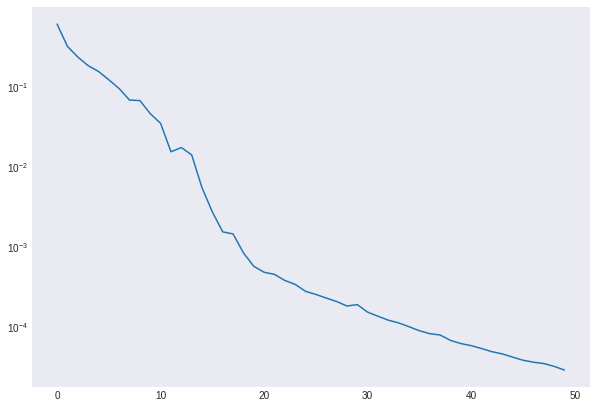

In [ ]:
plt.plot(history.history["loss"])
plt.yscale("log")

Note, we're using *luminosity* for training,

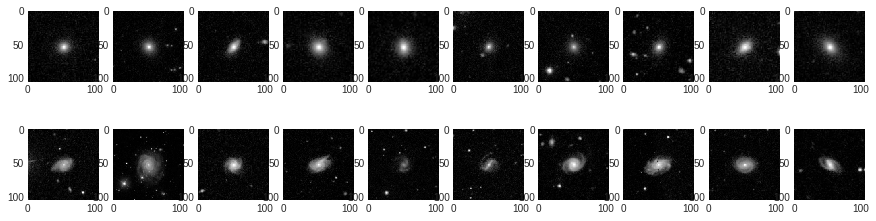

In [27]:
# -- plot the first 10 elliptical and spirals
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(feat[ii])
for ii in range(10):
  ax[1, ii].imshow(feat[5000 + ii])
fig.show()

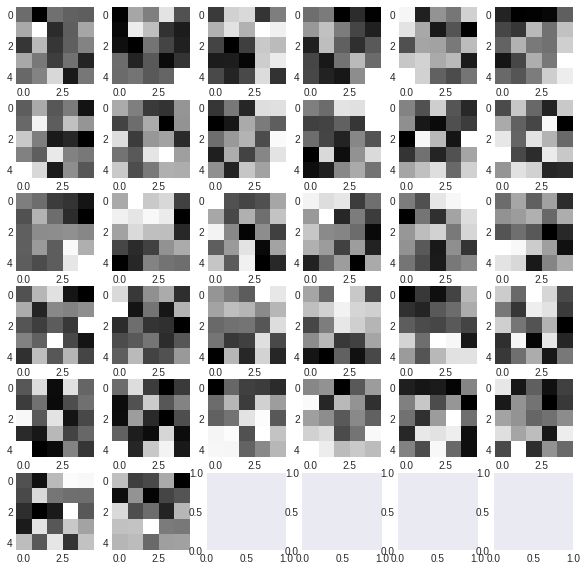

In [28]:
# -- plot the first layer filters
ww = model.get_weights()[0]
fig, ax = plt.subplots(6, 6, figsize=[10, 10])
for ii in range(32):
  ax[ii // 6, ii % 6].imshow(ww[:, :, 0, ii])
fig.show()

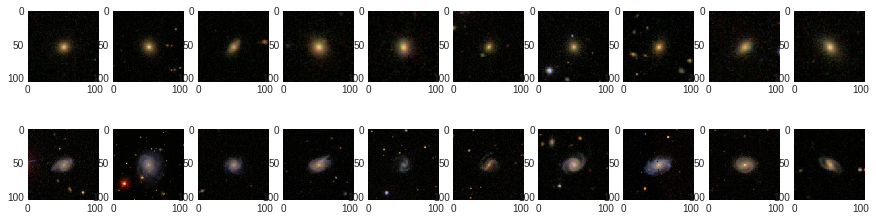

In [29]:
# -- plot the first 10 elliptical and spirals
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(gals[ii])
for ii in range(10):
  ax[1, ii].imshow(gals[5000 + ii])
fig.show()

But...

In [31]:
model.predict(spiral[0:3])

ValueError: ignored

In [30]:
spiral[0:3].shape

(3, 106, 106, 3)